In [89]:
import pandas as pd
from textblob import TextBlob
pd.set_option('display.max_colwidth', -1)
raw_df = pd.read_csv("billboard_lyrics_1964-2015.csv")

In [90]:
tmp = raw_df[['Year','Lyrics']].groupby('Year')

In [162]:
#List of common cuss words
bad = ["fuck","shit", "nigga","bitch","ass","asshole",
       "pussy","sex","slut","hoe","piss","damn","douche","bastard",
      "damn","fag","dick","douche","cock", "fucks"," fucked"]
#Group by year and loop through to count cuss word and 'Love'
data = list()
for name, group in tmp:
    corpus = TextBlob(group['Lyrics'].to_string())
    love = corpus.words.count('love')
    cuss = sum([corpus.words.count(item) for item in bad])
    data.append({"Year": name, "Love": love, "Cuss": cuss})

In [118]:
plotData = pd.DataFrame(data)

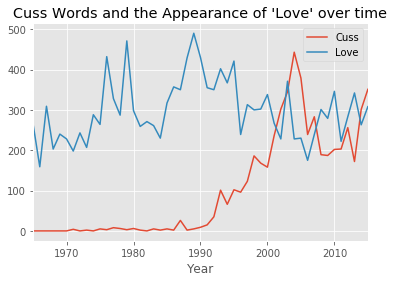

In [124]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(); 
plotData.plot(x = "Year", title = "Cuss Words and the Appearance of 'Love' over time");
plt.show()